In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the extracted features csv

In [33]:
df_nrml = pd.read_csv("../data/normal_1.csv")
df_c2 = pd.read_csv("../data/metasploit_0_filtered.csv")

# Step 2: Compute rolling statistics for packet timing

In [34]:
window_sizes = [3, 5, 10]

# Compute time since last packet (Δt)
df_nrml["delta_t"] = df_nrml["frame.time_relative"].diff().fillna(0)
df_c2["delta_t"] = df_c2["frame.time_relative"].diff().fillna(0)

for window in window_sizes:
    # Rolling Standard Deviation of Δt
    df_nrml[f"rolling_std_{window}"] = df_nrml["delta_t"].rolling(window=window, min_periods=1).std()
    df_c2[f"rolling_std_{window}"] = df_c2["delta_t"].rolling(window=window, min_periods=1).std()

    # Ratio of Time Between Packets (Δt / Rolling Mean Δt)
    df_nrml[f"delta_t_ratio_{window}"] = df_nrml["delta_t"] / df_nrml["delta_t"].rolling(window=window, min_periods=1).mean()
    df_nrml[f"delta_t_ratio_{window}"] = df_nrml[f"delta_t_ratio_{window}"].fillna(0)  # Replace NaNs properly

    df_c2[f"delta_t_ratio_{window}"] = df_c2["delta_t"] / df_c2["delta_t"].rolling(window=window, min_periods=1).mean()
    df_c2[f"delta_t_ratio_{window}"] = df_c2[f"delta_t_ratio_{window}"].fillna(0)  # Replace NaNs properly


In [35]:
df_nrml

,frame.time_relative,ip.proto,frame.len,tcp.flags,src_ip,dst_ip,c2_label,delta_t,rolling_std_3,delta_t_ratio_3,rolling_std_5,delta_t_ratio_5,rolling_std_10,delta_t_ratio_10
0,0.000000,17,327,0,0,0,0,0.000000e+00,NaN,0.000000,NaN,0.000000,NaN,0.000000
1,0.190066,17,75,0,0,0,0,1.900661e-01,0.134397,2.000000,0.134397,2.000000,0.134397,2.000000
2,0.190066,17,75,0,0,0,0,3.310000e-07,0.109735,0.000005,0.109735,0.000005,0.109735,0.000005
3,0.190165,17,75,0,0,1,0,9.844000e-05,0.109706,0.001553,0.095017,0.002071,0.095017,0.002071
4,0.190165,17,75,0,0,1,0,8.200000e-08,0.000057,0.002489,0.084989,0.000002,0.084989,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312588,1174.191454,6,90,24,0,1,0,1.643980e-04,0.020167,0.010134,0.016346,0.015749,0.012153,0.030812
312589,1174.191454,6,66,17,0,1,0,1.680000e-07,0.022386,0.000013,0.016389,0.000016,0.012162,0.000032
312590,1174.204623,6,66,16,1,0,0,1.316841e-02,0.007556,2.962972,0.015903,1.064763,0.012243,1.988965
312591,1174.204623,6,66,17,1,0,0,3.119999e-07,0.007603,0.000071,0.016871,0.000030,0.012256,0.000047


In [36]:
df_c2

,frame.time_relative,ip.proto,frame.len,tcp.flags,src_ip,dst_ip,c2_label,delta_t,rolling_std_3,delta_t_ratio_3,rolling_std_5,delta_t_ratio_5,rolling_std_10,delta_t_ratio_10
0,0.000000,6,66,2,0,1,1,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
1,0.000653,6,66,18,1,0,1,0.000653,0.000462,2.000000,0.000462,2.000000,0.000462,2.000000
2,0.000691,6,54,16,0,1,1,0.000038,0.000367,0.164978,0.000367,0.164978,0.000367,0.164978
3,0.003554,6,212,24,0,1,1,0.002863,0.001486,2.416714,0.001350,3.222285,0.001350,3.222285
4,0.003799,6,60,16,1,0,1,0.000245,0.001575,0.233630,0.001204,0.322453,0.001204,0.322453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,349.656217,6,54,16,0,1,1,0.045221,1.232204,0.061579,0.954553,0.100523,0.985174,0.070955
1599,351.926392,6,383,24,0,1,1,2.270175,1.297562,2.940269,1.196528,2.512039,1.082973,2.640267
1600,351.927397,6,201,24,1,0,1,0.001005,1.297530,0.001302,1.204617,0.001123,1.036765,0.001516
1601,351.972556,6,54,16,0,1,1,0.045159,1.297548,0.058488,1.005179,0.095576,1.033719,0.067665


# Step 3: Visualize rolling statistics

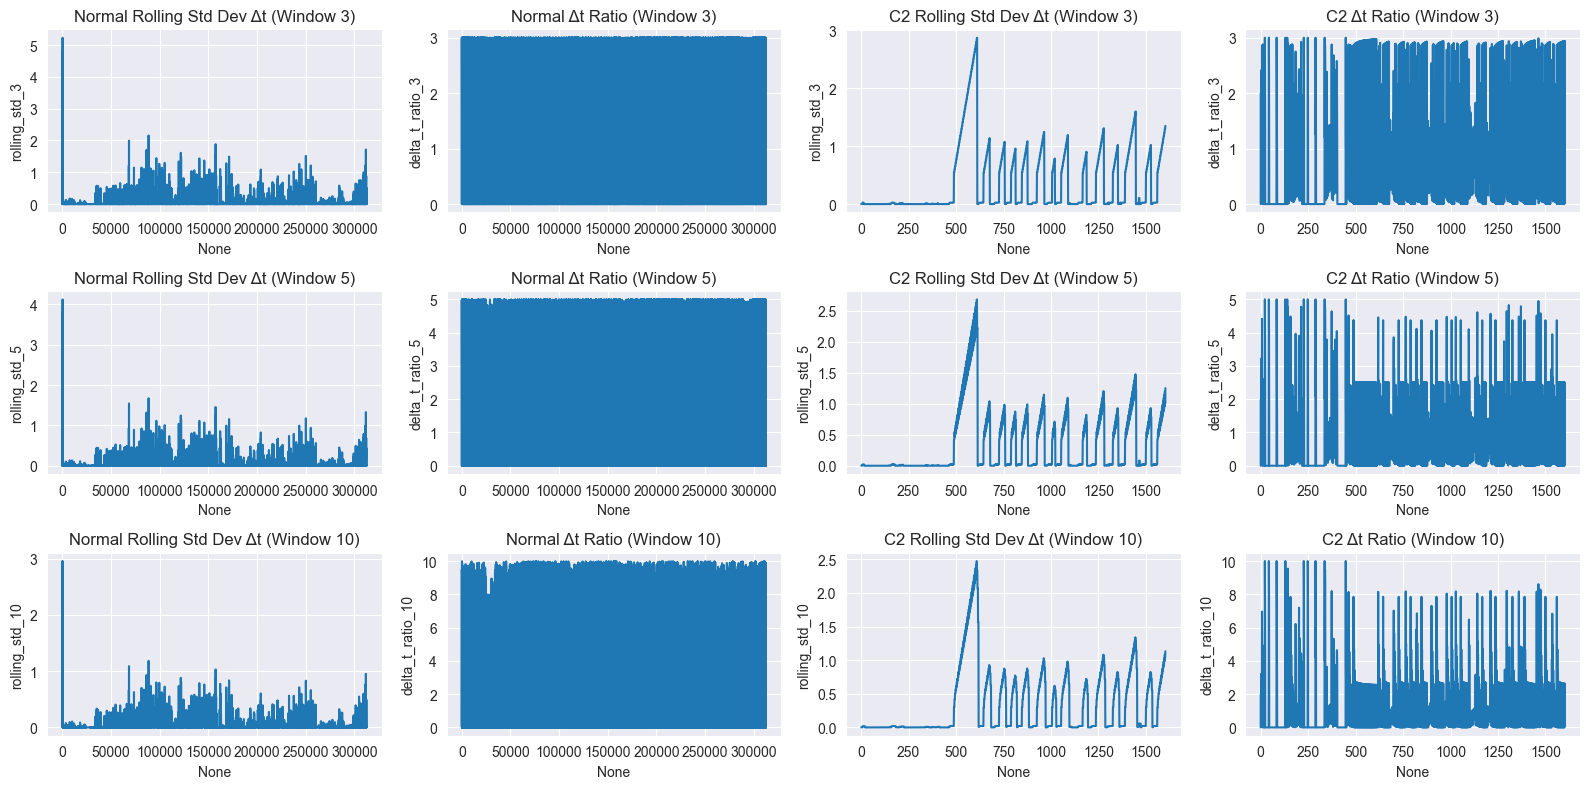

In [37]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(len(window_sizes), 4, figsize=(16, 8))

for i, window in enumerate(window_sizes):
    # Normal Traffic
    sns.lineplot(ax=axes[i, 0], data=df_nrml, x=df_nrml.index, y=f"rolling_std_{window}")
    axes[i, 0].set_title(f"Normal Rolling Std Dev Δt (Window {window})")

    sns.lineplot(ax=axes[i, 1], data=df_nrml, x=df_nrml.index, y=f"delta_t_ratio_{window}")
    axes[i, 1].set_title(f"Normal Δt Ratio (Window {window})")

    # C2 Traffic
    sns.lineplot(ax=axes[i, 2], data=df_c2, x=df_c2.index, y=f"rolling_std_{window}")
    axes[i, 2].set_title(f"C2 Rolling Std Dev Δt (Window {window})")

    sns.lineplot(ax=axes[i, 3], data=df_c2, x=df_c2.index, y=f"delta_t_ratio_{window}")
    axes[i, 3].set_title(f"C2 Δt Ratio (Window {window})")

plt.tight_layout()
plt.show()
